In [1]:
weatherkey="08d52be04d5c8a8b14fbe3cd3a7f3ad9"

In [2]:
import os

In [3]:
import pandas as pd

In [4]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [5]:
from citipy import citipy

In [6]:
dir(citipy)

['City',
 'WORLD_CITIES_DICT',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_current_dir',
 '_current_filename',
 '_world_cities_csv_path',
 '_world_cities_kdtree',
 'c',
 'cities',
 'city',
 'city_coordinate_key',
 'csv',
 'csv_file',
 'kdtree',
 'nearest_city',
 'os']

In [9]:
coord=pd.DataFrame(citipy.WORLD_CITIES_DICT.keys())

In [11]:
import requests

In [12]:
coord.columns=[['Lat','Lon']]

In [13]:
coord.head()

,Lat,Lon
0,42.500000,1.516667
1,42.566667,1.600000
2,42.533333,1.583333
3,42.550000,1.516667
4,42.500000,1.533333


In [14]:
url='https://api.openweathermap.org/data/2.5/weather?&APPID=08d52be04d5c8a8b14fbe3cd3a7f3ad9&lat=42.5&lon=1.516667'

In [15]:
requests.get('https://api.openweathermap.org/data/2.5/weather?&APPID=08d52be04d5c8a8b14fbe3cd3a7f3ad9&lat=42.5&lon=1.516667').json()

{'coord': {'lon': 1.52, 'lat': 42.5},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 286.74,
  'pressure': 1019,
  'humidity': 57,
  'temp_min': 280.37,
  'temp_max': 290.93},
 'wind': {'speed': 3.47, 'deg': 20.827},
 'clouds': {'all': 5},
 'dt': 1567464573,
 'sys': {'type': 3,
  'id': 2007275,
  'message': 0.0071,
  'country': 'AD',
  'sunrise': 1567488045,
  'sunset': 1567535192},
 'timezone': 7200,
 'id': 3041563,
 'name': 'Andorra la Vella',
 'cod': 200}

In [22]:
randomfive=coord.sample(n=500)

In [23]:
randomfive['Lat'].head()

,Lat
2247,-17.500000
14333,36.866667
35679,55.191900
3436,-1.533333
16078,47.609242


In [24]:
randomfive['Lon'].head()

,Lon
2247,-63.166667
14333,22.700000
35679,32.411100
3436,-49.216667
16078,19.602790


In [28]:
urls=['https://api.openweathermap.org/data/2.5/weather?&units=Imperial&APPID=c98b6b2b276942cddc9785bd7fea2c90&lat='
      +str(i)+'&lon='+str(v) for i,v in randomfive.values]

In [29]:
allcities= [requests.get(url).json() for url in urls]

In [30]:
allcities[0]

{'coord': {'lon': -63.17, 'lat': -17.5},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 80.6,
  'pressure': 1008,
  'humidity': 44,
  'temp_min': 80.6,
  'temp_max': 80.6},
 'visibility': 7000,
 'wind': {'speed': 16.11, 'deg': 340},
 'clouds': {'all': 0},
 'dt': 1567464842,
 'sys': {'type': 1,
  'id': 8661,
  'message': 0.0076,
  'country': 'BO',
  'sunrise': 1567419555,
  'sunset': 1567461965},
 'timezone': -14400,
 'id': 3901301,
 'name': 'Warnes',
 'cod': 200}

In [31]:
allcities[0]['coord']['lat']

-17.5

In [32]:
allcities[0]['main']['temp']

80.6

In [33]:
allcities[0]['main']['humidity']

44

In [34]:
allcities[0]['wind']['speed']

16.11

In [35]:
allcities[0]['clouds']['all']

0

In [36]:
temp_yaxis=[allcities[i]['main']['temp'] for i in range(len(randomfive))]

In [37]:
lat_xaxis=[allcities[i]['coord']['lat'] for i in range(len(randomfive))]

In [38]:
humid_yaxis=[allcities[i]['main']['humidity'] for i in range(len(randomfive))]

In [39]:
wind_yaxis=[allcities[i]['wind']['speed'] for i in range(len(randomfive))]

In [40]:
cloud_yaxis=[allcities[i]['clouds']['all'] for i in range(len(randomfive))]

In [64]:
import matplotlib.pyplot as plt

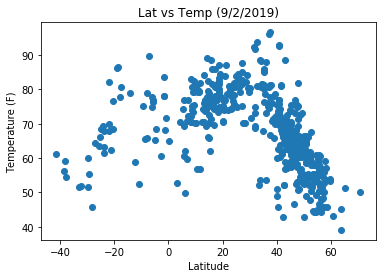

In [68]:
plt.scatter(lat_xaxis,temp_yaxis)
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Lat vs Temp (9/2/2019)')
plt.savefig('LatvsTemp.png')

The plot shows almost a symmetrical decrease in the temperature as we move further from 20 degrees

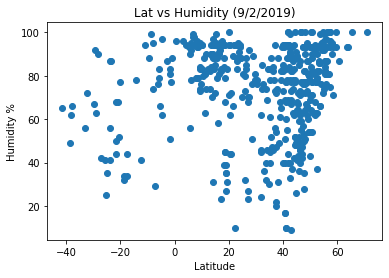

In [69]:
plt.scatter(lat_xaxis,humid_yaxis)
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title('Lat vs Humidity (9/2/2019)')
plt.savefig('LatvsHumidity.png')

the plot shows an exponential increase in the humidity from 0 degrees up to 60 degrees

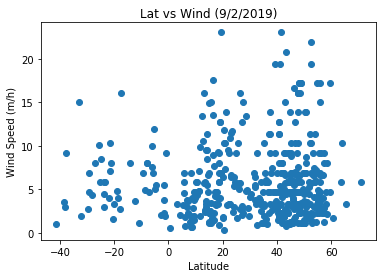

In [70]:
plt.scatter(lat_xaxis,wind_yaxis)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/h)')
plt.title('Lat vs Wind (9/2/2019)')
plt.savefig('Latvswindspeed.png')

the plot shows a decrease in the wind from 0 degrees up to 60 degrees

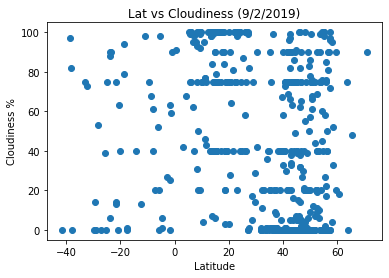

In [71]:
plt.scatter(lat_xaxis,cloud_yaxis)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title('Lat vs Cloudiness (9/2/2019)')
plt.savefig('LatvsCloudiness.png')

the plot shows that the majority of clouds are between 30 degrees to 55 degrees